In [4]:
import xarray as xr
from cdo import *
from index import *
from tools import *
from cdotesting import *

fieldname=namelist[telecname]['field']

diagname = 'teleconnections'
machine = 'wilma'
namelist = load_namelist(diagname)
config = load_config(machine)

telecname='ENSO'
infile=config[diagname][telecname]['input']
fieldname=namelist[telecname]['field']

In [5]:
avg_cdo = regional_mean_cdo(infile,namelist,telecname)

In [10]:
test_cdo = avg_cdo.drop_vars('lon')
test_cdo = test_cdo.drop_vars('lat')
test_cdo = test_cdo.squeeze(['lat','lon'],drop=True)
test_cdo = test_cdo.drop_vars('time_bnds')

test_cdo


<xarray.Dataset>
Dimensions:  (time: 490)
Coordinates:
  * time     (time) datetime64[ns] 1979-02-14T21:00:00 ... 2019-11-15T21:00:00
Data variables:
    skt      (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Fri Feb 10 11:37:39 2023: cdo -O -s -runmean,3 /tmp/cdoPy2_...
    frequency:    mon
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [11]:
field = xr.open_mfdataset(infile)[fieldname]
avg_lib = regional_mean_index(field,namelist,telecname)

In [13]:
test_lib = avg_lib.dropna(dim='time')
test_lib

<xarray.DataArray 'skt' (time: 490)>
dask.array<getitem, shape=(490,), dtype=float64, chunksize=(490,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1979-02-14T21:00:00 ... 2019-11-15T21:00:00

In [15]:
xr.testing.assert_allclose(test_lib,test_cdo[namelist[telecname]['field']],rtol=0.1,atol=0.1)

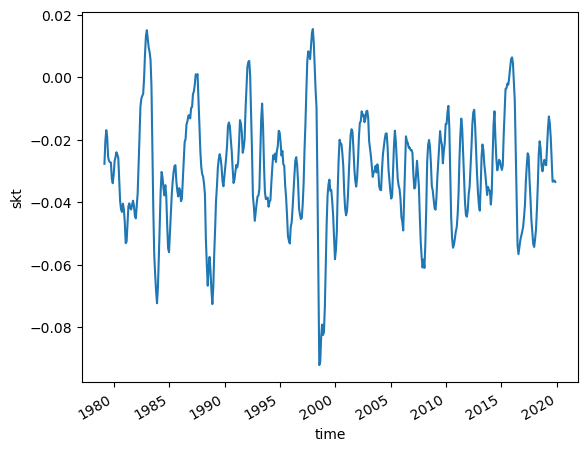

In [17]:
diff = test_lib-test_cdo[namelist[telecname]['field']]
diff.plot()